In [1]:
# Trabalho com o MNIST - numeros manuscritos
from keras.datasets import mnist
from keras.utils import to_categorical
#Modelo da rede
from keras.models import Sequential
#Camadas que serão utilizadas
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout


# Carregando o dataset separando os dados de treino e de teste
(x_treino, y_treino), (x_teste, y_teste) = mnist.load_data()

# Trazendo a função `to_categorical` para transformar os labels em one-hot encoding
y_treino_cat = to_categorical(y_treino)
y_teste_cat = to_categorical(y_teste)

# Normalização dos dados de entrada
x_treino_norm = x_treino/x_treino.max()
x_teste_norm = x_teste/x_teste.max()

# Reshape dos dados de entrada para adicionar o canal de cor
x_treino_flat = x_treino.reshape(len(x_treino), 28*28)
x_teste_flat = x_teste.reshape(len(x_teste), 28*28)


# Criação do modelo LeNet5
model = Sequential()
model.add(Dense(10, activation='softmax'))


In [2]:
# Constroi o modelo
model.build()
# Exibe um resumo do modelo
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [3]:
#Compila o modelo
from keras.optimizers import Adam
adam = Adam()
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'], optimizer=adam)

# Realiza o treinamento do modelo
historico = model.fit(x_treino_flat, y_treino_cat, epochs=15,validation_split=0.2)

model.save('models/modelo_mnist_linear.h5')

Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7578 - loss: 18.1796 - val_accuracy: 0.8868 - val_loss: 5.8046
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8743 - loss: 6.3389 - val_accuracy: 0.8888 - val_loss: 5.6200
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8819 - loss: 5.7234 - val_accuracy: 0.8869 - val_loss: 5.7948
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8854 - loss: 5.5872 - val_accuracy: 0.9037 - val_loss: 5.3703
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8910 - loss: 5.1036 - val_accuracy: 0.9005 - val_loss: 5.1777
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8895 - loss: 5.1705 - val_accuracy: 0.8911 - val_loss: 5.5902
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8926 - loss: 4.9676 - val_accuracy: 0.8729 - val_loss: 6.6933
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8915 - loss: 5.0382 -

Text(0, 0.5, 'accuracy')

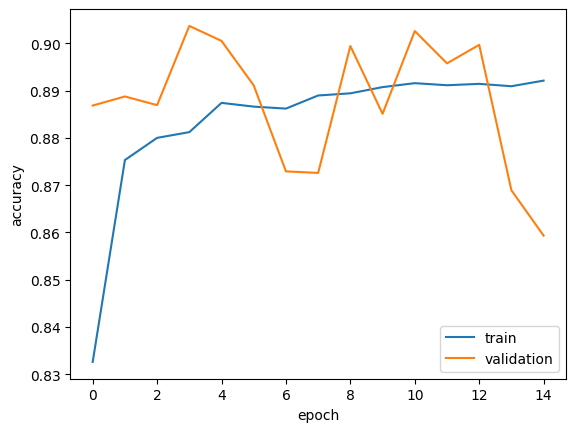

In [4]:
from matplotlib import pyplot as plt

plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.legend(['train', 'validation'])
plt.xlabel('epoch')
plt.ylabel('accuracy')